In [1]:
import numpy as np
import pandas as pd

In [2]:
#Loading dataset
df=pd.read_csv('IMDB_dataset_w2v.csv')

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [22]:
#Defining dependant and independant features
X=df['review'].tolist()
y=df['sentiment']

In [25]:
y=pd.get_dummies(y)

In [ ]:
y

In [27]:
y=y["positive"].values

In [28]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [29]:
#train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=45)

In [30]:
#Importing SentenceTransformer
import sentence_transformers
from sentence_transformers import SentenceTransformer

In [31]:
#Loading bert model
sbert_model=SentenceTransformer('all-MiniLM-L6-v2')

In [56]:
len(X_train)

40000

In [32]:
# generating word embeddings for training data
train_comment_embeddings = sbert_model.encode(X_train)

In [33]:
# generating word embeddings for test data 
test_comment_embeddings = sbert_model.encode(X_test)

In [34]:
#Redefining training/testing variables
Xtrain=train_comment_embeddings
ytrain=y_train
Xtest=test_comment_embeddings
ytest=y_test

In [37]:
# defining confusion matrix
def classification_report(ytest, ypred):
    '''Plotting confusion matrix'''
    skplt.plot_confusion_matrix(ytest,ypred)
    plt.show()

In [ ]:
#Building model: SVC
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(Xtrain, ytrain)
y_pred = svclassifier.predict(Xtest)

a=ytest.shape[0]
b=(ytest!=y_pred).sum()


Accuracy =81.590000%


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


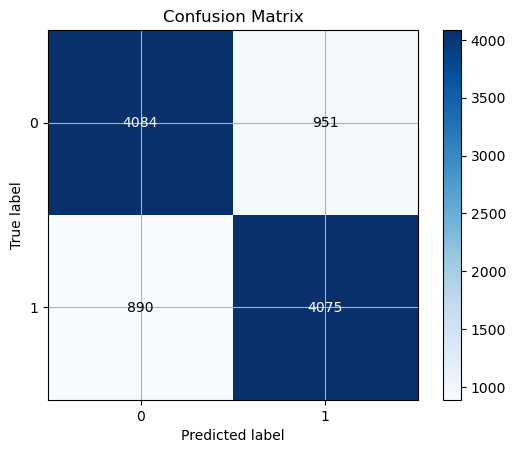

In [43]:
import scikitplot.plotters as skplt
import matplotlib.pyplot as plt
print("Accuracy ="+format((a-b)/a*100,'2f')+"%")
#print(classification_report(ytest, y_pred))
plot_cmat(ytest, y_pred)

In [ ]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

lr.fit(Xtrain, ytrain)

pred=lr.predict(Xtest)



In [52]:
#Model performance evaluation
from sklearn.metrics import accuracy_score
accuracy_score(ytest, pred)*100

81.23